In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [4]:
df=yf.download('SQ',start='2019-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900
...,...,...,...,...,...,...
2023-02-07,82.080002,83.855003,80.660004,83.180000,83.180000,9804500
2023-02-08,82.900002,84.290001,81.120003,81.129997,81.129997,7213400
2023-02-09,81.349998,82.080002,75.599998,76.180000,76.180000,17350900


In [5]:
df['ma_20']=df.Close.rolling(20).mean()
df['vol']=df.Close.rolling(20).std()
df['upper_bb']=df.ma_20+(2*df.vol)
df['lower_bb']=df.ma_20+(2*df.vol)
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800,NaN,NaN,NaN,NaN
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-02-07,82.080002,83.855003,80.660004,83.180000,83.180000,9804500,78.598001,5.606992,89.811985,89.811985
2023-02-08,82.900002,84.290001,81.120003,81.129997,81.129997,7213400,79.153001,5.252411,89.657823,89.657823
2023-02-09,81.349998,82.080002,75.599998,76.180000,76.180000,17350900,79.378501,5.005234,89.388970,89.388970


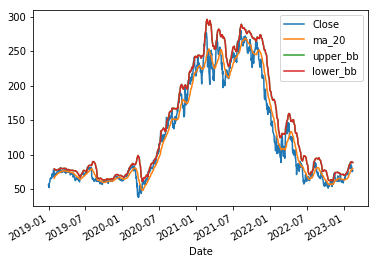

In [6]:
df[['Close','ma_20','upper_bb','lower_bb']].plot()

In [8]:
df['rsi']=ta.momentum.rsi(df.Close,window=6)
conditions=[(df.rsi<30)&(df.Close<df.lower_bb),
            (df.rsi>70)&(df.Close>df.upper_bb)]

In [9]:
choices=['Buy','Sell']

In [10]:
df['signal']=np.select(conditions,choices)
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800,NaN,NaN,NaN,NaN,NaN,0
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN,NaN,0
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN,NaN,0
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN,NaN,0
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,82.080002,83.855003,80.660004,83.180000,83.180000,9804500,78.598001,5.606992,89.811985,89.811985,55.176253,0
2023-02-08,82.900002,84.290001,81.120003,81.129997,81.129997,7213400,79.153001,5.252411,89.657823,89.657823,46.949343,0
2023-02-09,81.349998,82.080002,75.599998,76.180000,76.180000,17350900,79.378501,5.005234,89.388970,89.388970,32.785114,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.signal

Date
2019-01-29    0
2019-01-30    0
2019-01-31    0
2019-02-01    0
2019-02-04    0
             ..
2023-02-07    0
2023-02-08    0
2023-02-09    0
2023-02-10    0
2023-02-13    0
Name: signal, Length: 1019, dtype: object

In [14]:
df.signal=df.signal.shift()
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2019-01-29,72.260002,72.430000,68.050003,68.559998,68.559998,32382900,65.887500,6.630276,79.148052,79.148052,45.231041,NaN
2019-01-30,71.010002,71.599998,68.720001,71.529999,71.529999,18710400,66.659500,6.321133,79.301766,79.301766,53.309548,NaN
2019-01-31,70.029999,73.860001,69.980003,71.349998,71.349998,15679400,67.367000,5.989839,79.346678,79.346678,52.743745,0
2019-02-01,71.050003,71.279999,69.720001,70.800003,70.800003,12677800,68.286000,4.883736,78.053472,78.053472,50.768058,0
2019-02-04,71.000000,72.620003,70.400002,71.750000,71.750000,10582100,68.964500,4.315380,77.595259,77.595259,54.315084,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,82.080002,83.855003,80.660004,83.180000,83.180000,9804500,78.598001,5.606992,89.811985,89.811985,55.176253,0
2023-02-08,82.900002,84.290001,81.120003,81.129997,81.129997,7213400,79.153001,5.252411,89.657823,89.657823,46.949343,0
2023-02-09,81.349998,82.080002,75.599998,76.180000,76.180000,17350900,79.378501,5.005234,89.388970,89.388970,32.785114,0


In [17]:
for index,row in df.iterrows():
    print(index)
    print(row)

2019-01-29 00:00:00
Open         72.260002
High             72.43
Low          68.050003
Close        68.559998
Adj Close    68.559998
Volume        32382900
ma_20          65.8875
vol           6.630276
upper_bb     79.148052
lower_bb     79.148052
rsi          45.231041
signal             NaN
Name: 2019-01-29 00:00:00, dtype: object
2019-01-30 00:00:00
Open         71.010002
High         71.599998
Low          68.720001
Close        71.529999
Adj Close    71.529999
Volume        18710400
ma_20          66.6595
vol           6.321133
upper_bb     79.301766
lower_bb     79.301766
rsi          53.309548
signal             NaN
Name: 2019-01-30 00:00:00, dtype: object
2019-01-31 00:00:00
Open         70.029999
High         73.860001
Low          69.980003
Close        71.349998
Adj Close    71.349998
Volume        15679400
ma_20           67.367
vol           5.989839
upper_bb     79.346678
lower_bb     79.346678
rsi          52.743745
signal               0
Name: 2019-01-31 00:00:00, dty

Name: 2019-12-11 00:00:00, dtype: object
2019-12-12 00:00:00
Open         65.650002
High         66.199997
Low          65.089996
Close        65.860001
Adj Close    65.860001
Volume         4827300
ma_20          66.9715
vol           1.568856
upper_bb     70.109213
lower_bb     70.109213
rsi          37.265874
signal               0
Name: 2019-12-12 00:00:00, dtype: object
2019-12-13 00:00:00
Open         66.019997
High         66.339996
Low          64.485001
Close        64.800003
Adj Close    64.800003
Volume         7047500
ma_20           67.062
vol           1.366212
upper_bb     69.794424
lower_bb     69.794424
rsi          28.090781
signal               0
Name: 2019-12-13 00:00:00, dtype: object
2019-12-16 00:00:00
Open              65.0
High         67.300003
Low               65.0
Close        66.529999
Adj Close    66.529999
Volume         6325600
ma_20          67.1535
vol           1.256576
upper_bb     69.666652
lower_bb     69.666652
rsi          51.484566
signal      

Name: 2020-06-02 00:00:00, dtype: object
2020-06-03 00:00:00
Open              88.0
High         92.550003
Low          87.089996
Close        91.970001
Adj Close    91.970001
Volume        17089200
ma_20          79.3615
vol           5.165701
upper_bb     89.692902
lower_bb     89.692902
rsi          87.531729
signal               0
Name: 2020-06-03 00:00:00, dtype: object
2020-06-04 00:00:00
Open         90.959999
High         92.959999
Low          86.190002
Close        87.720001
Adj Close    87.720001
Volume        13368100
ma_20          80.3425
vol           4.761693
upper_bb     89.865887
lower_bb     89.865887
rsi           64.68956
signal               0
Name: 2020-06-04 00:00:00, dtype: object
2020-06-05 00:00:00
Open              90.0
High         91.449997
Low          88.067001
Close            89.93
Adj Close        89.93
Volume        11127700
ma_20           81.108
vol           5.017098
upper_bb     91.142196
lower_bb     91.142196
rsi          69.634261
signal      

Name: 2020-12-14 00:00:00, dtype: object
2020-12-15 00:00:00
Open         218.414993
High         221.720001
Low          216.729996
Close        219.990005
Adj Close    219.990005
Volume          5713600
ma_20        206.457499
vol            9.816906
upper_bb      226.09131
lower_bb      226.09131
rsi           71.011473
signal                0
Name: 2020-12-15 00:00:00, dtype: object
2020-12-16 00:00:00
Open         223.860001
High         227.960007
Low          220.029999
Close        227.080002
Adj Close    227.080002
Volume          8216500
ma_20        208.416499
vol            9.828032
upper_bb     228.072563
lower_bb     228.072563
rsi           78.850622
signal                0
Name: 2020-12-16 00:00:00, dtype: object
2020-12-17 00:00:00
Open              230.0
High         237.089996
Low          227.699997
Close        230.740005
Adj Close    230.740005
Volume         10440100
ma_20          210.6765
vol            9.481468
upper_bb     229.639436
lower_bb     229.639436
r

Name: 2021-08-16 00:00:00, dtype: object
2021-08-17 00:00:00
Open         260.980011
High             264.25
Low          257.910004
Close        260.880005
Adj Close    260.880005
Volume          5707800
ma_20        265.327998
vol            8.987775
upper_bb     283.303549
lower_bb     283.303549
rsi           37.357114
signal                0
Name: 2021-08-17 00:00:00, dtype: object
2021-08-18 00:00:00
Open         261.540009
High         266.666992
Low          259.079987
Close        259.660004
Adj Close    259.660004
Volume          4705100
ma_20        265.448499
vol             8.88939
upper_bb     283.227278
lower_bb     283.227278
rsi           35.448559
signal                0
Name: 2021-08-18 00:00:00, dtype: object
2021-08-19 00:00:00
Open         256.839996
High         260.480011
Low          254.139999
Close        257.350006
Adj Close    257.350006
Volume          5121000
ma_20        265.286499
vol            9.011278
upper_bb     283.309055
lower_bb     283.309055
r

2022-03-02 00:00:00
Open             124.93
High         125.529999
Low          118.761002
Close        124.260002
Adj Close    124.260002
Volume         18998500
ma_20           108.601
vol           10.745625
upper_bb     130.092251
lower_bb     130.092251
rsi           66.974582
signal                0
Name: 2022-03-02 00:00:00, dtype: object
2022-03-03 00:00:00
Open         123.129997
High         123.643997
Low          113.080002
Close        114.220001
Adj Close    114.220001
Volume         18089100
ma_20            108.61
vol           10.750495
upper_bb      130.11099
lower_bb      130.11099
rsi           50.859919
signal                0
Name: 2022-03-03 00:00:00, dtype: object
2022-03-04 00:00:00
Open             116.68
High         119.709999
Low              105.07
Close        106.519997
Adj Close    106.519997
Volume         23137800
ma_20           108.861
vol           10.633724
upper_bb     130.128448
lower_bb     130.128448
rsi           41.639421
signal            

Open         90.870003
High         92.099998
Low          85.360001
Close        85.989998
Adj Close    85.989998
Volume        15075900
ma_20        77.400999
vol           7.988646
upper_bb     93.378291
lower_bb     93.378291
rsi          58.596194
signal               0
Name: 2022-08-11 00:00:00, dtype: object
2022-08-12 00:00:00
Open         88.010002
High         88.629997
Low          85.010002
Close        87.949997
Adj Close    87.949997
Volume        10433200
ma_20        78.499499
vol            7.84474
upper_bb     94.188979
lower_bb     94.188979
rsi          62.570209
signal               0
Name: 2022-08-12 00:00:00, dtype: object
2022-08-15 00:00:00
Open         87.720001
High            89.194
Low          86.019997
Close        86.720001
Adj Close    86.720001
Volume         9905200
ma_20        79.521999
vol           7.491626
upper_bb     94.505251
lower_bb     94.505251
rsi           58.35249
signal               0
Name: 2022-08-15 00:00:00, dtype: object
2022-08-1

In [19]:
position=False
buydates,selldates=[],[]
buyprices,sellprices=[],[]
for index,row in df.iterrows():
    if not position and row['signal']=='Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position=True
        
    if position and row['signal']=='Sell':
        selldates.append(index)
        sellprices.append(row.Open)
        position=False
    

In [20]:
sellprices

[71.19999694824219,
 67.16999816894531,
 68.45999908447266,
 72.04000091552734,
 172.42999267578125,
 207.4499969482422,
 259.7699890136719,
 262.8500061035156,
 234.91000366210938,
 133.66000366210938,
 74.66000366210938,
 74.7699966430664]

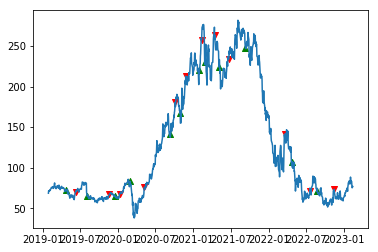

In [28]:
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index,df.loc[buydates].Close,marker='^',c='g')
plt.scatter(df.loc[selldates].index,df.loc[selldates].Close,marker='v',c='r')

In [29]:
(pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)])+1).prod()-1

-0.1664152343238141

In [30]:
df['Shifted_Close']=df.Close.shift()

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal,Shifted_Close
Date,,,,,,,,,,,,,
2019-01-29,72.260002,72.430000,68.050003,68.559998,68.559998,32382900,65.887500,6.630276,79.148052,79.148052,45.231041,NaN,NaN
2019-01-30,71.010002,71.599998,68.720001,71.529999,71.529999,18710400,66.659500,6.321133,79.301766,79.301766,53.309548,NaN,68.559998
2019-01-31,70.029999,73.860001,69.980003,71.349998,71.349998,15679400,67.367000,5.989839,79.346678,79.346678,52.743745,0,71.529999
2019-02-01,71.050003,71.279999,69.720001,70.800003,70.800003,12677800,68.286000,4.883736,78.053472,78.053472,50.768058,0,71.349998
2019-02-04,71.000000,72.620003,70.400002,71.750000,71.750000,10582100,68.964500,4.315380,77.595259,77.595259,54.315084,0,70.800003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,82.080002,83.855003,80.660004,83.180000,83.180000,9804500,78.598001,5.606992,89.811985,89.811985,55.176253,0,82.550003
2023-02-08,82.900002,84.290001,81.120003,81.129997,81.129997,7213400,79.153001,5.252411,89.657823,89.657823,46.949343,0,83.180000
2023-02-09,81.349998,82.080002,75.599998,76.180000,76.180000,17350900,79.378501,5.005234,89.388970,89.388970,32.785114,0,81.129997
